In [1]:
#Dependancies 
import pandas as pd
import json
import pprint
import requests
from random import *
from citipy import citipy
import time
import matplotlib.pyplot as plt
from config import api_key

In [2]:



#to store data in list in order to zip into tuple for later use
city_list=[]
country_code=[]
#make loop so that 500 cities and country codes are stored 
while len(city_list) <=1000:
    #random latitude and longitude 
    latitude =randint(-90.00,90.00)
    longitude =randint(-180.00, 180.00)
    # get citipy info for nearest city name and country code add to dictionary 
    city=citipy.nearest_city(latitude, longitude)
    if city.city_name not in city_list:
        city_list.append(city.city_name)
        country_code.append(city.country_code)
    else:
        continue
#make tuple for later unpack with city name and country code to use in loop for API        

city_data=tuple(zip(city_list,country_code))


In [3]:

#Make Lists for data that we need
Latitude=[]
Tempurature_F=[]
Humidity_Percent=[]
Cloudiness_Percent=[]
Wind_Speed_MPH=[]
Cities=[]
Countries=[]
Date=[]
#variables to hold city name and country code for api, counter to count how many data points generated per minute 
#slow loop down every 60 data points so that API doesn't freeze
#make variable for city name and city code, create counter for n and sets to parse data in 50 city chunk
city_name=""
country_code=""
n=1
set=1
print("Beginning Data Retrieval\n-----------------------------")
#loop tupel in order to unpack and parse through api loop to recieve data; put data into lists
for a,b in city_data:
    city_name=a.capitalize()
    city_name=city_name.replace(" ", "")
    country_code=b
    url=f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&units=imperial"
    response=requests.get(url+api_key)
    response_list=requests.get(url+api_key).json()
    try:
            Latitude.append(response_list["coord"]["lat"])
            Tempurature_F.append(response_list["main"]["temp_max"])
            Humidity_Percent.append(response_list["main"]["humidity"])
            Cloudiness_Percent.append(response_list["clouds"]["all"])
            Wind_Speed_MPH.append(response_list["wind"]["speed"])
            Cities.append(city_name)
            Countries.append(country_code)
            Date.append(response_list["dt"])
            print (f"Processing Record {n} of Set {set} | {city_name}\n {url}{api_key}")
            n=n+1
            if n==51:
             #add value to set and reset n
                set=set+1
                n=1
                #pause
                time.sleep(10)
                if set==11:
                    break
            
            
    except (KeyError):
         print("error")
           
    






Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Bluff
 http://api.openweathermap.org/data/2.5/weather?q=Bluff,nz&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 2 of Set 1 | Albany
 http://api.openweathermap.org/data/2.5/weather?q=Albany,au&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 3 of Set 1 | Bredasdorp
 http://api.openweathermap.org/data/2.5/weather?q=Bredasdorp,za&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 4 of Set 1 | Barrow
 http://api.openweathermap.org/data/2.5/weather?q=Barrow,us&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 5 of Set 1 | Wasilla
 http://api.openweathermap.org/data/2.5/weather?q=Wasilla,us&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 6 of Set 1 | Khatanga
 http://api.openweathermap.org/data/2.5/weather?q=Khatanga,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 7 o

Processing Record 3 of Set 2 | Castro
 http://api.openweathermap.org/data/2.5/weather?q=Castro,cl&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 4 of Set 2 | Hermanus
 http://api.openweathermap.org/data/2.5/weather?q=Hermanus,za&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 5 of Set 2 | Naze
 http://api.openweathermap.org/data/2.5/weather?q=Naze,jp&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 6 of Set 2 | Atuona
 http://api.openweathermap.org/data/2.5/weather?q=Atuona,pf&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 7 of Set 2 | Firminy
 http://api.openweathermap.org/data/2.5/weather?q=Firminy,fr&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 8 of Set 2 | Hamilton
 http://api.openweathermap.org/data/2.5/weather?q=Hamilton,bm&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 9 of Set 2 | Daru
 http://api.openweathermap.org/dat

Processing Record 5 of Set 3 | Owando
 http://api.openweathermap.org/data/2.5/weather?q=Owando,cg&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 6 of Set 3 | Mahebourg
 http://api.openweathermap.org/data/2.5/weather?q=Mahebourg,mu&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 7 of Set 3 | Thompson
 http://api.openweathermap.org/data/2.5/weather?q=Thompson,ca&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 8 of Set 3 | Skjervoy
 http://api.openweathermap.org/data/2.5/weather?q=Skjervoy,no&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 9 of Set 3 | Atbasar
 http://api.openweathermap.org/data/2.5/weather?q=Atbasar,kz&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 10 of Set 3 | Ustyuzhna
 http://api.openweathermap.org/data/2.5/weather?q=Ustyuzhna,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 11 of Set 3 | Progreso
 http://api.openweatherm

error
error
error
error
Processing Record 7 of Set 4 | Valdivia
 http://api.openweathermap.org/data/2.5/weather?q=Valdivia,cl&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 8 of Set 4 | Tomari
 http://api.openweathermap.org/data/2.5/weather?q=Tomari,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 9 of Set 4 | Hithadhoo
 http://api.openweathermap.org/data/2.5/weather?q=Hithadhoo,mv&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 10 of Set 4 | Wote
 http://api.openweathermap.org/data/2.5/weather?q=Wote,ke&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 11 of Set 4 | Poum
 http://api.openweathermap.org/data/2.5/weather?q=Poum,nc&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 12 of Set 4 | Banff
 http://api.openweathermap.org/data/2.5/weather?q=Banff,ca&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 13 of Set 4 | Wentzville
 http://api.openwe

Processing Record 10 of Set 5 | Georgetown
 http://api.openweathermap.org/data/2.5/weather?q=Georgetown,sh&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 11 of Set 5 | Moindou
 http://api.openweathermap.org/data/2.5/weather?q=Moindou,nc&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 12 of Set 5 | Imbituba
 http://api.openweathermap.org/data/2.5/weather?q=Imbituba,br&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 13 of Set 5 | Takoradi
 http://api.openweathermap.org/data/2.5/weather?q=Takoradi,gh&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 14 of Set 5 | Nipawin
 http://api.openweathermap.org/data/2.5/weather?q=Nipawin,ca&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 15 of Set 5 | Nuuk
 http://api.openweathermap.org/data/2.5/weather?q=Nuuk,gl&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 16 of Set 5 | Deputatskiy
 http://api.open

Processing Record 12 of Set 6 | Zalantun
 http://api.openweathermap.org/data/2.5/weather?q=Zalantun,cn&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 13 of Set 6 | Troitskoye
 http://api.openweathermap.org/data/2.5/weather?q=Troitskoye,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 14 of Set 6 | Leh
 http://api.openweathermap.org/data/2.5/weather?q=Leh,in&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 15 of Set 6 | Atambua
 http://api.openweathermap.org/data/2.5/weather?q=Atambua,id&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 16 of Set 6 | Dmitriyevka
 http://api.openweathermap.org/data/2.5/weather?q=Dmitriyevka,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 17 of Set 6 | Kruisfontein
 http://api.openweathermap.org/data/2.5/weather?q=Kruisfontein,za&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
error
Processing Record 18 of Set 6 | Am

Processing Record 14 of Set 7 | Coahuayana
 http://api.openweathermap.org/data/2.5/weather?q=Coahuayana,mx&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 15 of Set 7 | Mithi
 http://api.openweathermap.org/data/2.5/weather?q=Mithi,pk&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 16 of Set 7 | Coihaique
 http://api.openweathermap.org/data/2.5/weather?q=Coihaique,cl&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 17 of Set 7 | Luanda
 http://api.openweathermap.org/data/2.5/weather?q=Luanda,ao&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 18 of Set 7 | Moba
 http://api.openweathermap.org/data/2.5/weather?q=Moba,cd&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 19 of Set 7 | Paamiut
 http://api.openweathermap.org/data/2.5/weather?q=Paamiut,gl&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 20 of Set 7 | Astoria
 http://api.openweat

Processing Record 17 of Set 8 | Tocache
 http://api.openweathermap.org/data/2.5/weather?q=Tocache,pe&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 18 of Set 8 | Yuzhno-kurilsk
 http://api.openweathermap.org/data/2.5/weather?q=Yuzhno-kurilsk,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 19 of Set 8 | Nuqui
 http://api.openweathermap.org/data/2.5/weather?q=Nuqui,co&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 20 of Set 8 | Rantepao
 http://api.openweathermap.org/data/2.5/weather?q=Rantepao,id&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
error
Processing Record 21 of Set 8 | Iqaluit
 http://api.openweathermap.org/data/2.5/weather?q=Iqaluit,ca&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 22 of Set 8 | Roald
 http://api.openweathermap.org/data/2.5/weather?q=Roald,no&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
error
Processing Record 23 of Set 8 | 

Processing Record 19 of Set 9 | Itapora
 http://api.openweathermap.org/data/2.5/weather?q=Itapora,br&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 20 of Set 9 | Chapais
 http://api.openweathermap.org/data/2.5/weather?q=Chapais,ca&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 21 of Set 9 | Turukhansk
 http://api.openweathermap.org/data/2.5/weather?q=Turukhansk,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 22 of Set 9 | Yarkovo
 http://api.openweathermap.org/data/2.5/weather?q=Yarkovo,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 23 of Set 9 | Nador
 http://api.openweathermap.org/data/2.5/weather?q=Nador,ma&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 24 of Set 9 | Inverell
 http://api.openweathermap.org/data/2.5/weather?q=Inverell,au&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 25 of Set 9 | Berja
 http://api.openweathermap.o

Processing Record 21 of Set 10 | Aykhal
 http://api.openweathermap.org/data/2.5/weather?q=Aykhal,ru&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 22 of Set 10 | Statesville
 http://api.openweathermap.org/data/2.5/weather?q=Statesville,us&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 23 of Set 10 | Honningsvag
 http://api.openweathermap.org/data/2.5/weather?q=Honningsvag,no&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 24 of Set 10 | Snasa
 http://api.openweathermap.org/data/2.5/weather?q=Snasa,no&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 25 of Set 10 | Auki
 http://api.openweathermap.org/data/2.5/weather?q=Auki,sb&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 26 of Set 10 | Viedma
 http://api.openweathermap.org/data/2.5/weather?q=Viedma,ar&units=imperial&APPID=7b19c47aad8b7a8160a41622a5667a66
Processing Record 27 of Set 10 | Pangoa
 http://api.openweathe

In [4]:
#make dictionary and data frame from collected API data
Weather_data_dict={"City":Cities,"Country Code":Countries,"Date":Date,"Latitude":Latitude,"Max_Tempurature_F":Tempurature_F,
                   "Humidity_Percent":Humidity_Percent,
                   "Cloudiness_Percent":Cloudiness_Percent,"Wind_Speed_MPH":Wind_Speed_MPH}
#switch to data frame pandas
Weather_Data_df=pd.DataFrame(Weather_data_dict)
#make sure there are no holes in data 
Weather_Data_df.count()

City                  500
Cloudiness_Percent    500
Country Code          500
Date                  500
Humidity_Percent      500
Latitude              500
Max_Tempurature_F     500
Wind_Speed_MPH        500
dtype: int64

In [5]:
#display data frame head 

Weather_Data_df.to_csv("Weather_Data.csv")
Weather_Data_df.head()


,City,Cloudiness_Percent,Country Code,Date,Humidity_Percent,Latitude,Max_Tempurature_F,Wind_Speed_MPH
0,Bluff,68,nz,1522700320,100,-46.60,56.78,28.07
1,Albany,0,au,1522700035,96,-35.02,56.78,3.58
2,Bredasdorp,76,za,1522695600,88,-34.53,64.40,1.12
3,Barrow,90,us,1522697700,75,39.51,41.00,13.87
4,Wasilla,1,us,1522698960,31,61.58,35.60,21.92


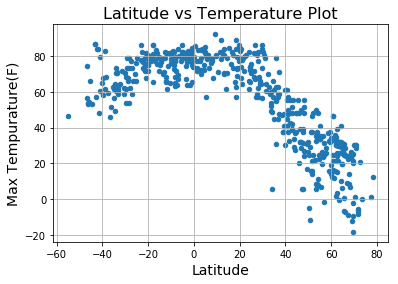

In [6]:
#Latitude vs Temperature Plot
Weather_Data_df.plot(kind="scatter", x=["Latitude"], y=["Max_Tempurature_F"])
plt.title("Latitude vs Temperature Plot",size="16")
plt.xlabel("Latitude",size=14)
plt.ylabel("Max Tempurature(F)",size=14)
plt.grid()
plt.savefig("Latitude vs Temperature Plot")
plt.show()


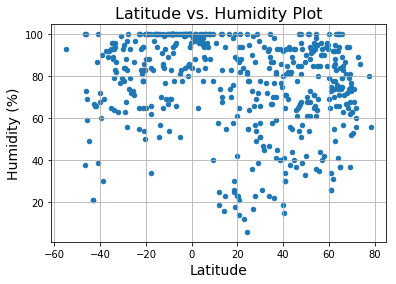

In [7]:
#Latitude vs. Humidity Plot
Weather_Data_df.plot(kind="scatter", x=["Latitude"], y=["Humidity_Percent"])
plt.title("Latitude vs. Humidity Plot",size="16")
plt.xlabel("Latitude",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.grid()
plt.savefig("Latitude vs. Humidity Plot.png")
plt.show()


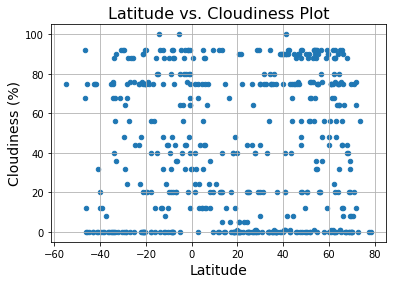

In [8]:
#Latitude vs. Cloudiness Plot
Weather_Data_df.plot(kind="scatter", x=["Latitude"], y=["Cloudiness_Percent"])
plt.title("Latitude vs. Cloudiness Plot",size="16")
plt.xlabel("Latitude",size=14)
plt.ylabel("Cloudiness (%)",size=14)
plt.grid()
plt.savefig("Latitude vs. Cloudiness Plot.png")
plt.show()

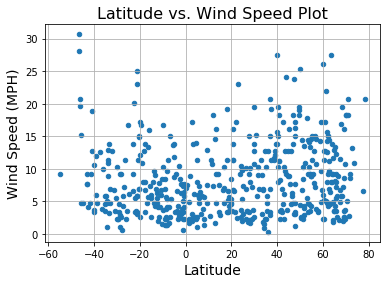

In [9]:
#Latitude vs. Wind Speed Plot
Weather_Data_df.plot(kind="scatter", x=["Latitude"], y=["Wind_Speed_MPH"])
plt.title("Latitude vs. Wind Speed Plot",size="16")
plt.xlabel("Latitude",size=14)
plt.ylabel("Wind Speed (MPH)",size=14)
plt.grid()
plt.savefig("Latitude vs. Wind Speed Plot.png")
plt.show()